In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from random import shuffle
def getName(filePath):
    return filePath.split("/")[-1]
 
def importDataInfo(path):
    columns = ['Center', 'Left', 'Right', 'Steering', 'Throttle', 'Brake', 'Speed']
    data = pd.read_csv(os.path.join(path, 'driving_log.csv'), names = columns)
    #### REMOVE FILE PATH AND GET ONLY FILE NAME
    #print(getName(data['center'][0]))
    data['Center']=data['Center'].apply(getName)
    #print(data.head())
    print('Total Images Imported',data.shape[0])
    return data

def balanceData(data,display=True):
    nBin = 31
    samplesPerBin = 500
    hist, bins = np.histogram(data['Steering'], nBin)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
        plt.bar(center, hist, width=0.06)
        plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samplesPerBin, samplesPerBin))
        plt.show()
    removeindexList = []
    for j in range(nBin):
        binDataList = []
        for i in range(len(data['Steering'])):
            if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j + 1]:
                binDataList.append(i)
        binDataList = shuffle(binDataList)
        binDataList = binDataList[samplesPerBin:]
        removeindexList.extend(binDataList)
 
    print('Removed Images:', len(removeindexList))
    data.drop(data.index[removeindexList], inplace=True)
    print('Remaining Images:', len(data))
    if display:
        hist, _ = np.histogram(data['Steering'], (nBin))
        plt.bar(center, hist, width=0.06)
        plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samplesPerBin, samplesPerBin))
        plt.show()

path = '../data'
data = importDataInfo(path)
#data = balanceData(data,display=True)

Total Images Imported 4014


In [3]:
data.head(4)

Center  \
0  C:\Users\prashant.goswami\DS\Autonomous drivin...   
1  C:\Users\prashant.goswami\DS\Autonomous drivin...   
2  C:\Users\prashant.goswami\DS\Autonomous drivin...   
3  C:\Users\prashant.goswami\DS\Autonomous drivin...   

                                                Left  \
0  C:\Users\prashant.goswami\DS\Autonomous drivin...   
1  C:\Users\prashant.goswami\DS\Autonomous drivin...   
2  C:\Users\prashant.goswami\DS\Autonomous drivin...   
3  C:\Users\prashant.goswami\DS\Autonomous drivin...   

                                               Right  Steering  Throttle  \
0  C:\Users\prashant.goswami\DS\Autonomous drivin...       0.0       0.0   
1  C:\Users\prashant.goswami\DS\Autonomous drivin...       0.0       0.0   
2  C:\Users\prashant.goswami\DS\Autonomous drivin...       0.0       0.0   
3  C:\Users\prashant.goswami\DS\Autonomous drivin...       0.0       0.0   

   Brake         Speed  
0    0.0  4.694650e-06  
1    0.0  6.875807e-07  
2    0.0  1.619969e-05  
3    0.0  2.787195e-06

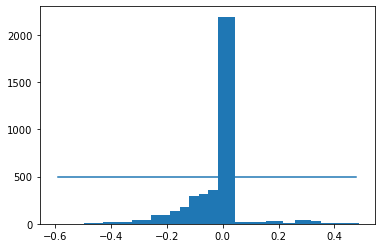

In [14]:
nBin = 31
samplesPerBin = 500
hist, bins = np.histogram(data['Steering'], nBin)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.06)
plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samplesPerBin, samplesPerBin))
plt.show()

In [17]:
bins = center

In [18]:
center

array([-0.57106262, -0.53671727, -0.50237192, -0.46802657, -0.43368122,
       -0.39933587, -0.36499051, -0.33064516, -0.29629981, -0.26195446,
       -0.22760911, -0.19326376, -0.1589184 , -0.12457305, -0.0902277 ,
       -0.05588235, -0.021537  ,  0.01280835,  0.0471537 ,  0.08149906,
        0.11584441,  0.15018976,  0.18453511,  0.21888046,  0.25322581,
        0.28757117,  0.32191652,  0.35626187,  0.39060722,  0.42495257,
        0.45929792])

In [19]:
removeindexList = []
for j in range(nBin):
    binDataList = []
    for i in range(len(data['Steering'])):
        if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j + 1]:
            binDataList.append(i)
    binDataList = shuffle(binDataList)
    binDataList = binDataList[samplesPerBin:]
    removeindexList.extend(binDataList)

print('Removed Images:', len(removeindexList))
data.drop(data.index[removeindexList], inplace=True)
print('Remaining Images:', len(data))

TypeError: 'NoneType' object is not subscriptable

In [11]:
nBin

31

In [10]:
data[data['Steering']>0]["Steering"]

656     0.052941
657     0.323529
658     0.452941
659     0.470588
975     0.117647
          ...   
3767    0.211765
3768    0.247059
3769    0.247059
3811    0.476471
3812    0.476471
Name: Steering, Length: 236, dtype: float64

In [20]:
print('Setting UP')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

Setting UP


In [77]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from random import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
import cv2
import random

def getName(filePath):
    return filePath.split("/")[-1]
 
def importDataInfo(path):
    columns = ['Center', 'Left', 'Right', 'Steering', 'Throttle', 'Brake', 'Speed']
    data = pd.read_csv(os.path.join(path, 'driving_log.csv'), names = columns)
    #### REMOVE FILE PATH AND GET ONLY FILE NAME
    #print(getName(data['center'][0]))
    data['Center']=data['Center'].apply(getName)
    #print(data.head())
    print('Total Images Imported',data.shape[0])
    return data

def balanceData(data,display=True):
    nBin = 31
    samplesPerBin = 500
    hist, bins = np.histogram(data['Steering'], nBin)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
        plt.bar(center, hist, width=0.06)
        plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samplesPerBin, samplesPerBin))
        plt.show()
        removeindexList = []
    for j in range(nBin):
        binDataList = []
        for i in range(len(data['Steering'])):
            if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j + 1]:
                binDataList.append(i)
        shuffle(binDataList)
        binDataList = binDataList[:samplesPerBin]
        removeindexList.extend(binDataList)
 
    print('Removed Images:', len(removeindexList))
    data.drop(data.index[removeindexList], inplace=True)
    print('Remaining Images:', len(data))
    return data

def loadData(path, data):
  imagesPath = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    imagesPath.append(f'{indexed_data[0]}')
    steering.append(float(indexed_data[3]))
  imagesPath = np.asarray(imagesPath)
  steering = np.asarray(steering)
  return imagesPath, steering

def augmentImage(imgPath,steering):
    img =  mpimg.imread(imgPath)
    if np.random.rand() < 0.5:
        pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
        img = pan.augment_image(img)
    if np.random.rand() < 0.5:
        zoom = iaa.Affine(scale=(1, 1.2))
        img = zoom.augment_image(img)
    if np.random.rand() < 0.5:
        brightness = iaa.Multiply((0.2, 1.2))
        img = brightness.augment_image(img)
    if np.random.rand() < 0.5:
        img = cv2.flip(img, 1)
        steering = -steering
    return img, steering

def preProcess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
def batchGen(imagesPath, steeringList, batchSize, trainFlag):
    while True:
        imgBatch = []
        steeringBatch = []
        for i in range(batchSize):
            index = random.randint(0, len(imagesPath) - 1)
            if trainFlag:
               img, steering = augmentImage(imagesPath[index], steeringList[index])
            else:
                img = mpimg.imread(imagesPath[index])
                steering = steeringList[index]
                img = preProcess(img)
                imgBatch.append(img)
                steeringBatch.append(steering)
        yield (np.asarray(imgBatch),np.asarray(steeringBatch))
            


Total Images Imported 2248


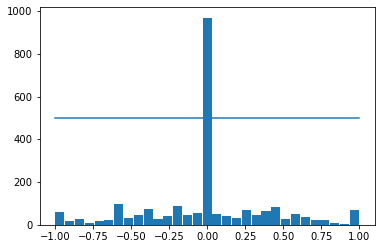

Removed Images: 1779
Remaining Images: 469
Total Training Images:  375
Total Validation Images:  94
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                    

c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10


ValueError: in user code:

    File "c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "conv2d_5" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


In [81]:

path = '../data2'
data = importDataInfo(path)
data = balanceData(data,display=True)
imagesPath, steerings = loadData(path,data)
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings, test_size=0.2,random_state=10)
print('Total Training Images: ',len(xTrain))
print('Total Validation Images: ',len(xVal))      

model = createModel()
model.summary()

history = model.fit(batchGen(xTrain, yTrain, 100, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batchGen(xVal, yVal, 100, 0),
                                  validation_steps=200)

In [55]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from random import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
import cv2
import random

def getName(filePath):
    return filePath.split("/")[-1]
 
def importDataInfo(path):
    columns = ['Center', 'Left', 'Right', 'Steering', 'Throttle', 'Brake', 'Speed']
    data = pd.read_csv(os.path.join(path, 'driving_log.csv'), names = columns)
    #### REMOVE FILE PATH AND GET ONLY FILE NAME
    #print(getName(data['center'][0]))
    data['Center']=data['Center'].apply(getName)
    #print(data.head())
    print('Total Images Imported',data.shape[0])
    return data

def balanceData(data,display=True):
    nBin = 31
    samplesPerBin = 500
    hist, bins = np.histogram(data['Steering'], nBin)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
        plt.bar(center, hist, width=0.06)
        plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samplesPerBin, samplesPerBin))
        plt.show()
        removeindexList = []
    for j in range(nBin):
        binDataList = []
        for i in range(len(data['Steering'])):
            if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j + 1]:
                binDataList.append(i)
        shuffle(binDataList)
        binDataList = binDataList[samplesPerBin:]
        removeindexList.extend(binDataList)
 
    print('Removed Images:', len(removeindexList))
    data.drop(data.index[removeindexList], inplace=True)
    print('Remaining Images:', len(data))
    return data

def loadData(path, data):
  imagesPath = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    imagesPath.append(f'{path}/IMG/{indexed_data[0]}')
    steering.append(float(indexed_data[3]))
  imagesPath = np.asarray(imagesPath)
  steering = np.asarray(steering)
  return imagesPath, steering

def augmentImage(imgPath,steering):
    img =  mpimg.imread(imgPath)
    if np.random.rand() < 0.5:
        pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
        img = pan.augment_image(img)
    if np.random.rand() < 0.5:
        zoom = iaa.Affine(scale=(1, 1.2))
        img = zoom.augment_image(img)
    if np.random.rand() < 0.5:
        brightness = iaa.Multiply((0.2, 1.2))
        img = brightness.augment_image(img)
    if np.random.rand() < 0.5:
        img = cv2.flip(img, 1)
        steering = -steering
    return img, steering

def preProcess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
def batchGen(imagesPath, steeringList, batchSize, trainFlag):
    while True:
        imgBatch = []
        steeringBatch = []
        for i in range(batchSize):
            index = random.randint(0, len(imagesPath) - 1)
            if trainFlag:
               img, steering = augmentImage(imagesPath[index], steeringList[index])
            else:
                img = mpimg.imread(imagesPath[index])
                steering = steeringList[index]
                img = preProcess(img)
                imgBatch.append(img)
                steeringBatch.append(steering)
            yield (np.asarray(imgBatch),np.asarray(steeringBatch))



Total Images Imported 2248


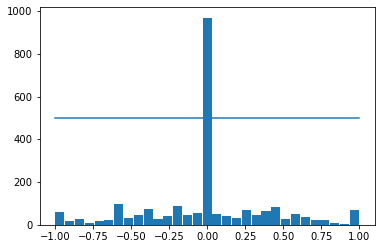

Removed Images: 469
Remaining Images: 1779


In [56]:
path = '../data2'
data = importDataInfo(path)
data = balanceData(data,display=True)

In [58]:
imagesPath, steerings = loadData(path,data)

In [52]:
data

In [59]:
imagesPath, steerings = loadData(path,data)
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings, test_size=0.2,random_state=10)
print('Total Training Images: ',len(xTrain))
print('Total Validation Images: ',len(xVal))  

Total Training Images:  1423
Total Validation Images:  356


In [61]:
from model import createModel
model = createModel()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

c:\Users\prashant.goswami\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [66]:
os.listdir(os.getcwd())

['.vscode',
 'Figure_1.png',
 'main.py',
 'model.py',
 'preprocess.py',
 'test.py',
 'train.py',
 'Untitled-1.ipynb',
 '__pycache__']

In [67]:
xTrain[0]

'../data2/IMG/C:\\Users\\prashant.goswami\\DS\\Autonomous driving hackathon\\data2\\IMG\\center_2022_10_01_14_03_27_137.jpg'

In [63]:
import cv2
img=cv2.imread(xTrain[0])

In [64]:
img

In [ ]:
history = model.fit(batchGen(xTrain, yTrain, 100, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batchGen(xVal, yVal, 100, 0),
                                  validation_steps=200)
model.save('model.h5')
